# 🚢Titanic EDA & Catboost [0.77511 score]🚢

<div class="alert alert-block alert-success">
    <b>LAST UPDATE:</b> 31<sup>st</sup> October 2023
</div>

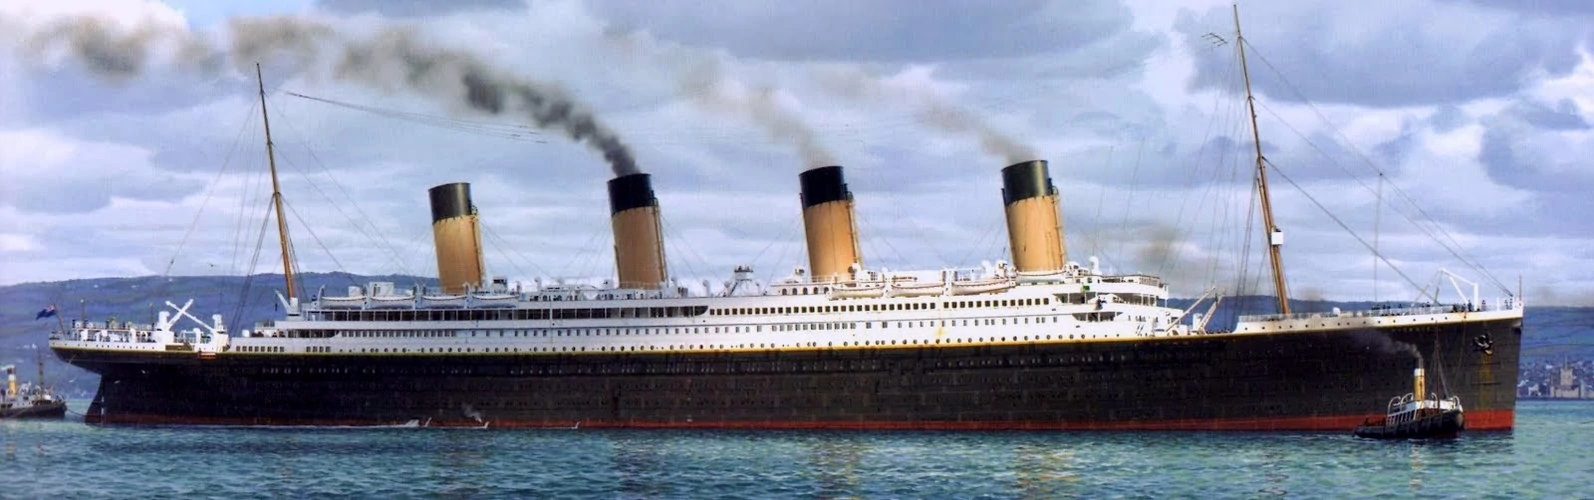

# Introduction 📚🚢

<div style="border-radius: 10px; border: #1260cc solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">

<b>👋WELCOME TO THIS NOTEBOOK🎉</b>
    
Here you will learn how to approach the <b>Titanic - Machine Learning from Disaster</b> competition using a <b>CatBoost Classifier</b> which achieves a remarkable <b>0.77511 Test Accuracy</b>. This notebook may be especially interesting for those who are <i>starting their Data Science journey</i>. <b>Want to learn more? Keep reading!</b><br><br>
    
The topics we cover here are:<br><br>
&emsp;🤔📊 <b>Exploratory Data Analysis</b> 📊🤔:<br>
&emsp;&emsp;- Explore and analyze the data (column by column)<br>
&emsp;&emsp;- See how to detect <b>missing values</b> and <b>outliers</b><br>
&emsp;&emsp;- <b>Visualize</b> each feature to check its distribution in train and test data<br>
&emsp;&emsp;- Try to make an initial guess on the <i>importance</i> of each feature<br>
&emsp;&emsp;- Take advantage of the <code>Name</code> column (most people will remove it)<br>
&emsp;&emsp;- Visualize the <b>Pearson Correlation Matrix</b><br>
&emsp;&emsp;- Learn how to use <code>Pandas</code> and <code>Seaborn</code> to create <b>beautiful EDA tools</b> for your Data Science projects!<br>

    
&emsp;🧹⚙️ <b>Data Preprocessing</b> ⚙️🧹:<br>
&emsp;&emsp;- Discover different ways to deal with <b>missing values</b><br>
&emsp;&emsp;- See how to impute the missing values of one column (e.g. <code>Age</code>) based on another column (e.g. <code>Name</code>)<br>
&emsp;&emsp;- Learn how to create your own Imputer following the <code>Sklearn Imputer</code> structure<br>
&emsp;&emsp;- Learn how to build robust, clean and reusable <code>Sklearn Pipelines</code> to process the data properly<br>


&emsp;🌲🏋️‍♂️ <b>CatBoost Training</b> 🏋️‍♂️🌲:<br>
&emsp;&emsp;- Train a <code>CatBoostClassifier</code> using the <code>catboost</code> library (<b>Gradient Boosting</b>)<br>
&emsp;&emsp;- <b>Optimize the hyperparameters</b> using <code>RandomizedSearchCV</code> from <code>Sklearn</code><br>
&emsp;&emsp;- Plot the <b>Feature Importance</b> based on the individual <i>decision trees</i><br>


&emsp;🏆🎯 <b>Submission File</b> 🎯🏆:<br>
&emsp;&emsp;- Build the <b>final classifier</b> to make predictions on the <b>Test Data</b><br>
&emsp;&emsp;- Use the <b>best set of hyperparmeters</b> found in the previous section<br>
&emsp;&emsp;- Create the submission file <code>submission.csv</code><br>
&emsp;&emsp;- <b>See your name in the Laderboard</b>!!! 😉<br>


# Let's get started! ⚡

In [1]:
## IMPORT THE NECESSARY PYTHON LIBRARIES

# Exploratory Data Analysis
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# Data Preprocessing
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.base import TransformerMixin

# Catboost Training
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostClassifier

In [2]:
# Read the data files
df_train = pd.read_csv('//kaggle/input/titanic/train.csv')
df_test = pd.read_csv('/kaggle/input/titanic/test.csv')

In [3]:
# Let's have a look at the first five training rows
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Check the size of the train and test datasets
print(df_train.shape, df_test.shape)

(891, 12) (418, 11)


In [5]:
# Look at the data types and number of missing values
print(df_train.info())
print()
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pc

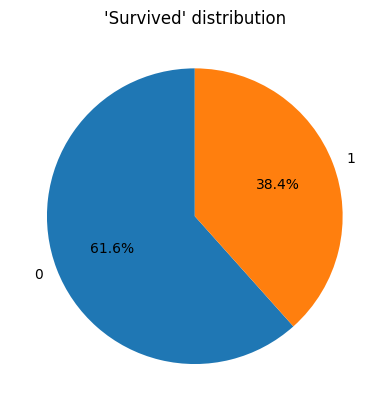

In [6]:
# Let's look at the distribution of the target 'Survived'
# The two classes are quite balanced: 62% vs 38%
df_target = df_train['Survived'].value_counts()
plt.pie(
    x=df_target, 
    labels=df_target.index,
    autopct='%1.1f%%',
    startangle=90
)
_ = plt.title("'Survived' distribution")

<div style="border-radius: 10px; border: #6b6b6b solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    <b>💡💡 THE DATA 💡💡</b>
    <ul>
        <li>A <b>binary classification</b> task. The target is <code>Survived</code>.</li>
        <li>The classes of the <b>target are quite balanced</b>: ~40% <code>True</code> and ~60% <code>False</code>.</li>
        <li>1309 data points. It is a <b>small dataset</b>. Actually there were 2240 passengers aboard the Titanic. </li>
        <li><b>Tran-Test split</b>: 891 in train data (68%), 418 in test data (32%).</li>
        <li><b>11 features</b>: 6 numerical (<code>float64</code> or <code>int64</code>) and 5 categorical (<code>object</code>).</li><br>
        <li><b>🔎 Columns Description 🔍:</b>
            <ul>
                <li><code>PassengerId</code>: passenger identifier</li>
                <li><code>Pclass</code>: ticket class {1: 1st, 2: 2nd, 3: 3rd}</li>
                <li><code>Name</code>: passenger's name and honorific title</li>
                <li><code>Sex</code>: 'male' or 'female'</li>
                <li><code>Age</code>: in years</li>
                <li><code>SibSp</code>: number of siblings and spouses aboard</li>
                <li><code>Parch</code>: number of parents and children aboard</li>
                <li><code>Ticket</code>: ticket number</li>
                <li><code>Fare</code>: passenger fare</li>
                <li><code>Cabin</code>: cabin number</li>
                <li><code>Embarked</code>: port of embarkation</li>
            </ul><br>
        <li><b>❌ Missing Values ❌:</b></li>
        <ul>
            <li><code>Age</code>: 20% in training data, 20% in test data</li>
            <li><code>Fare</code>: 1 sample in test data</li>
            <li><code>Cabin</code>: 77% in training data, 78% in test data</li>
            <li><code>Embarked</code>: 2 samples in training data</li>
        </ul>
    </ul>
</div>

## Exploratory Data Analysis 📊🤔

<div style="border-radius: 10px; border: #6b6b6b solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    
Before diving into the data, let's first create a function called <code>eda_bar_plots</code> that will help us to <b>visualize each feature and tell the importance it has in this task</b>. In other words, it let us perform a visual <i>Exploratory Data Analysis</i>.<br>
    
This function is intended to be used with categorical features or numerical features with a small set of unique values (e.g. a finite set of natural numbers). Given a <code>feature</code>, this function creates <b>3 bar plots</b>:
    <ol>
        <li>The distribution of <code>feature</code> in the Training Data</li>
        <li>The distribution of <code>feature</code> in the Test Data</li>
        <li>The relationship between the Target and the categories of <code>feature</code></li>
    </ol><br>
<b>But, what information can we get from these 3 plots?</b> I am glad you ask!🤪<br>
    <ul>
        <li>Look at the distributions of <code>feature</code> in both training and test dataset. <b>Are both distributions quite similar?</b> If that is <i>not</i> the case, we may not use this <code>feature</code> since it may not generalize well to test data [<b>Data Drift</b>].</li>
        <li>Look at the last plot to check that the categories in <code>feature</code> have something to say when predicting the Target (<code>Survived</code>). If that is the case, we should use this <code>feature</code> to train our models [<b>Feature Importance</b>].</li>
    </ul><br>
The good news is that you can <b>use this function in your other Data Science projects!</b>😉
    </div>

In [7]:
def eda_bar_plots(feature: str, target: str = 'Survived') -> None:
    """
    The given 'feature' is expected to be a categorical feature.
    Avoid calling this function with 'feature' == 'Age' or 'Fare'
    
    This function crates 3 bar plots to perform a visual
    Data Exploration analysis of the given 'feature'.
    """
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
    
    # (1) the distribution of 'feature' in the Training data
    df1 = df_train[feature].value_counts(normalize=True) 
    df1 = df1.sort_index().reset_index()
    # Now df1 has the columns: feature and 'proportion'
    sns.barplot(data=df1, x=feature, y='proportion', ax=ax1)
    # Set the title, the xlabel, and the ylabel.
    ax1.set(
        xlabel=feature, 
        ylabel='% of each category', 
        title=feature + ': % value counts [Training Data]'
    )
    # Plot a horizontal line at the proportion of a balanced
    # distribution of the categories in 'feature'
    ax1.axhline(
        y=1/len(df1), color='green', alpha=0.4, linestyle='--'
    )
    
    # (2) the distribution of 'feature' in the Test data
    df2 = df_test[feature].value_counts(normalize=True) 
    df2 = df2.sort_index().reset_index()
    # Now df2 has the columns: feature and 'proportion'
    sns.barplot(data=df2, x=feature, y='proportion', ax=ax2)
    # Set the title, the xlabel, and the ylabel.
    ax2.set(
        xlabel=feature, 
        ylabel='% of each category', 
        title=feature + ': % value counts [Test Data]'
    )
    # Plot a horizontal line at the proportion of a balanced
    # distribution of the categories in 'feature'
    ax2.axhline(
        y=1/len(df2), color='green', alpha=0.4, linestyle='--'
    )
    
    # (3) the relationship between the 'target' and the 
    # categories of 'feature' in the training data
    df3 = df_train.groupby(feature, as_index=False).agg(
        {target: 'mean'}
    ).sort_values(by=feature)
    sns.barplot(x=feature, y=target, data=df3, ax=ax3)
    ax3.set(
        xlabel=feature,
        ylabel=f'% {target}', 
        title=f"{feature}: prob of '{target}'"
    )
    # Plot a horizontal line at the baseline prediction
    # probability: two classes -> prob=0.5
    ax3.axhline(
        y=0.5, color='green', alpha=0.4, linestyle='--'
    )

<div style="border-radius: 10px; border: #fa9c1b solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    <b> 🌟 PassengerId 🌟</b> 
    <br>
    <dl>
        <dt><b>Description 📝:</b></dt>
        <dd>Passenger identifier
        </dd>
        <dt><b>Missing values 🤷‍♂️:</b></dt>
        <dd> None. <dd>
        <dt><b>Outliers 🔍:</b></dt>
        <dd> None.</dd>
        <dt><b>Comments 💬:</b></dt>
        <dd> 
            ➤ This column tells nothing about the passenger, it is not useful.<br>
            ➤ Remove the Training <code>PassengerId</code> column.<br>
            ➤ Keep the Test <code>PassengerId</code> to create the <i>Submission file</i> later.
        </dd>
    </dl>
</div>

In [8]:
df_train = df_train.drop(columns=['PassengerId'])

<div style="border-radius: 10px; border: #fa9c1b solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    <b> 🌟 Pclass 🌟</b> 
    <br>
    <dl>
        <dt><b>Description 📝:</b></dt>
        <dd>Ticket class [Upper, Middle, Lower]. Categorical feature.
        </dd>
        <dt><b>Missing values 🤷‍♂️:</b></dt>
        <dd> None. <dd>
        <dt><b>Outliers 🔍:</b></dt>
        <dd> None.</dd>
        <dt><b>Comments 💬:</b></dt>
        <dd> 
            ➤ The same categories appear in the training and test datasets<br>
            ➤ The distribution of categories in the training and test datasets are similar<br>
            ➤ More than 50% of the passengers bought third class tickets<br>
            ➤ Unsurprisingly: the higher your class, the more likely you are to survive...🤑
        </dd>
    </dl>
</div>

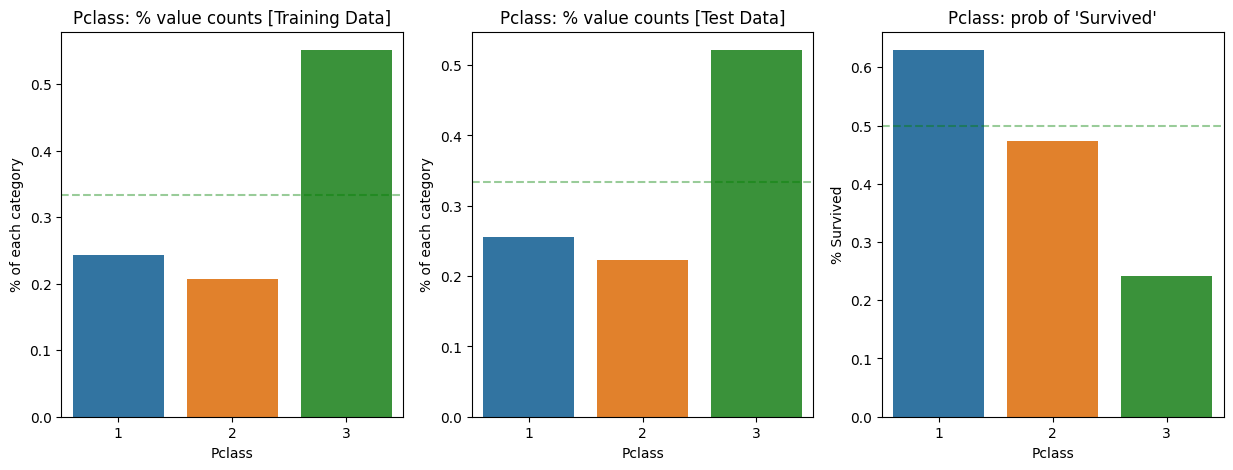

In [9]:
eda_bar_plots(feature='Pclass')

<div style="border-radius: 10px; border: #fa9c1b solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    <b> 🌟 Age 🌟</b> 
    <br>
    <dl>
        <dt><b>Description 📝:</b></dt>
        <dd>Age of the Passenger. Numerical feature.
        </dd>
        <dt><b>Missing values 🤷‍♂️:</b></dt>
        <dd> Almost 20% of the values are missing in both training and test data. <dd>
        <dt><b>Outliers 🔍:</b></dt>
        <dd> None. Normal range of ages.</dd>
        <dt><b>Comments 💬:</b></dt>
        <dd> 
            ➤ The distribution of Ages in the training and test datasets are similar.<br>
            ➤ The main problem here is that there are <b>many missing values</b>.<br>
            ➤ We will use the column <code>Name</code> (which contains the <i>honorific title</i>) to come up with an imputation strategy better than the basic <i>Median Imputer</i> (see later!).<br>
        </dd>
    </dl>
</div>

[Text(0.5, 1.0, "'Age' distribution")]

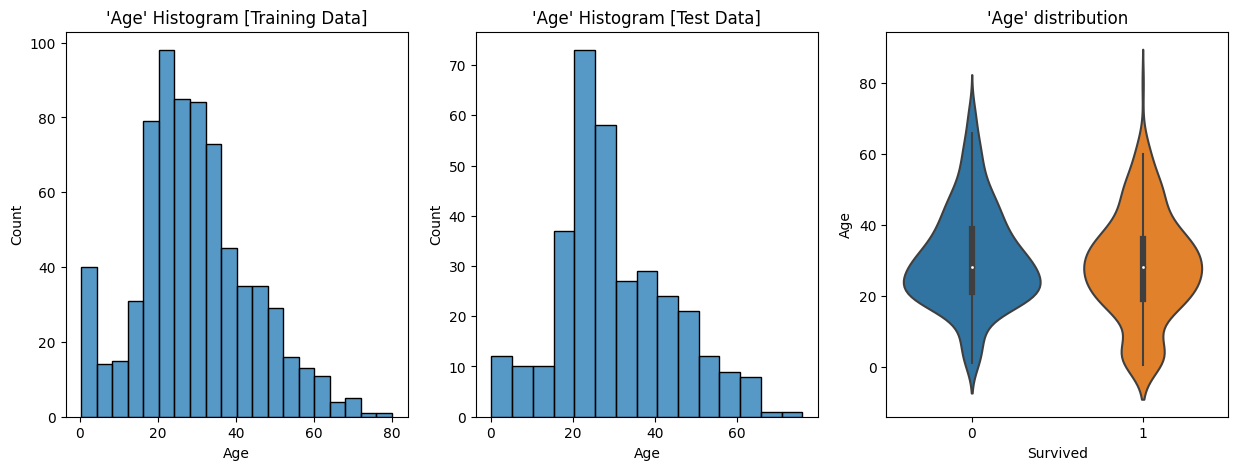

In [10]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
sns.histplot(data=df_train, x='Age', ax=ax1)
ax1.set(title="'Age' Histogram [Training Data]") 
sns.histplot(data=df_test, x='Age', ax=ax2)
ax2.set(title="'Age' Histogram [Test Data]") 
sns.violinplot(
    data=df_train, x='Survived', y='Age', fill=False, ax=ax3
)
ax3.set(title="'Age' distribution")

<div style="border-radius: 10px; border: #fa9c1b solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    <b> 🌟 Name 🌟</b> 
    <br>
    <dl>
        <dt><b>Description 📝:</b></dt>
        <dd>Passenger's name and honorific title. Categorical feature. The name of the passengers may be irrelevant, but the honorific title will be useful.
        </dd>
        <dt><b>Missing values 🤷‍♂️:</b></dt>
        <dd> None. <dd>
        <dt><b>Outliers 🔍:</b></dt>
        <dd> There are 4 honorific titles that represent the <b>~96%</b> of the Training Passengers: <code>Mr</code>, <code>Mrs</code>, <code>Miss</code>, <code>Master</code>. The rest of honorific titles have very little representation (most of them are held by just one passenger). For this reason, we will only consider the Top4 most popular honorific titles.
            </dd>
        <dt><b>Comments 💬:</b></dt>
        <dd> 
            ➤ We will create a new column called <code>honorific_title</code> with just the <b>Top4</b> honorific titles: <code>Mr</code>, <code>Mrs</code>, <code>Miss</code>, <code>Master</code>. The rest of honorific titles will be set to <code>nan</code>.<br>
            <ul>
                <li><code>Mr</code> is used as an honorific title for adult men, regardless of their marital status.</li>
                <li><code>Mrs</code> is used as an honorific title for married women.</li>
                <li><code>Miss</code> is traditionally used to address unmarried women or girls.</li>
                <li><code>Master</code> is traditionally used to address young boys.</li>
            </ul>
            ➤ The Top4 honorific titles have different expected ages. <code>Miss</code> and <code>Master</code> are supposed to be younger than <code>Mr</code> and <code>Mrs</code>. This information will be useful to impute the missing <code>Age</code> values (see later).<br>
            ➤ The Training and Test datasets have different unique <code>honorific_title</code>, but the Top4 appear in both of them.<br>
            ➤ The distribution of the Top4 honorific titles in the training and test datasets are similar<br>
            ➤ At the end, remove the original <code>Name</code> column.
        </dd>
    </dl>
</div>

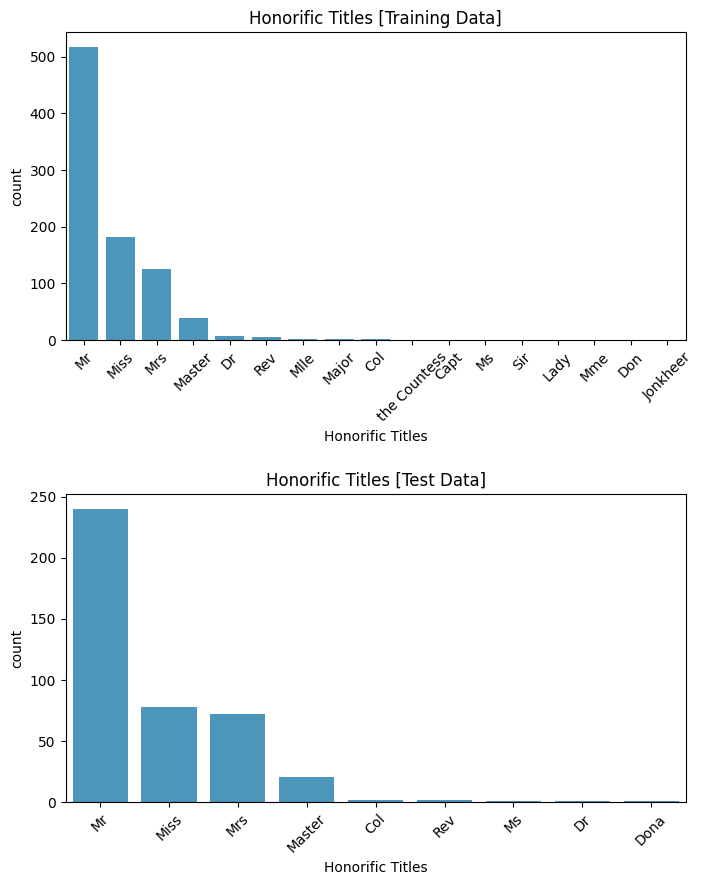

In [11]:
# An example of 'Name': "Braund, Mr. Owen Harris"
# In this example, we want to extract 'Mr'
# The honorific title is preceded by a ', '
# and followed by a '.' 
honorific_title_train = df_train['Name'].map(
    lambda n: n.split('.')[0].split(', ')[-1]
)
honorific_title_test = df_test['Name'].map(
    lambda n: n.split('.')[0].split(', ')[-1]
)

# Let's plot the frequency of each honorific title
# in both training and test datasets
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8,10))
fig.subplots_adjust(hspace=0.5)

# Honorific titles in Training data
sns.countplot(
    x=honorific_title_train,
    order=honorific_title_train.value_counts().index,
    color='#3a9bcd',
    ax=ax1
)
ax1.set(
    title='Honorific Titles [Training Data]', 
    xlabel='Honorific Titles'
)
ax1.tick_params(axis='x', rotation=45)

# Honorific titles in Test data
sns.countplot(
    x=honorific_title_test,
    order=honorific_title_test.value_counts().index,
    color='#3a9bcd',
    ax=ax2
)
ax2.set(
    title='Honorific Titles [Test Data]', 
    xlabel='Honorific Titles',
)
ax2.tick_params(axis='x', rotation=45)

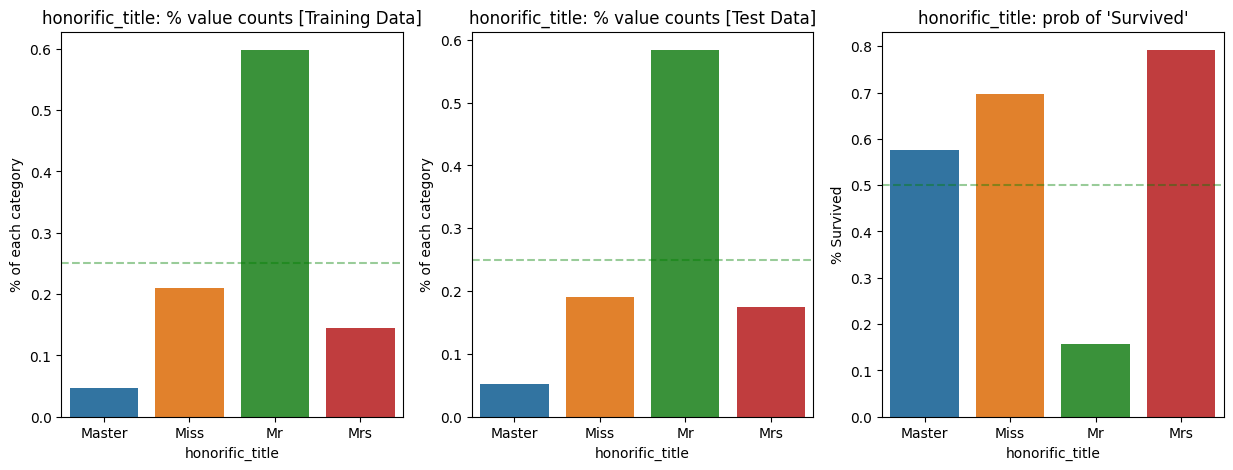

In [12]:
# Let's create the new column 'honorific_title'
top4_titles = ('Mr', 'Mrs', 'Miss', 'Master')

df_train['honorific_title'] = honorific_title_train.map(
    lambda h: h if h in top4_titles else np.nan
)
df_test['honorific_title'] = honorific_title_test.map(
    lambda h: h if h in top4_titles else np.nan
)

# Let's plot the distribution and importance of
# the new feature 'honorific_title'
eda_bar_plots(feature='honorific_title')

# Remove the original column 'Name'
df_train = df_train.drop(columns=['Name'])
df_test = df_test.drop(columns=['Name'])

<div style="border-radius: 10px; border: #6b6b6b solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    <b>💡❓ Will </b><code>honorific_title</code><b> help us impute the missing </b><code>Age</code><b> values? 💡❓</b><br><br>
    
Looking at the <code>stripplot</code> plot below, we can see that:<br>
&emsp;&emsp;✅ There is a clear difference between <code>Master</code> and <code>Mr</code> (very littler overlap)<br>
    &emsp;&emsp;❌ Such difference is not clear between <code>Miss</code> and <code>Mrs</code> (a lot of overlap)<br><br>
    
It may be better to rely on a <b>numerical statistical method</b>, instead of a visual method. For this reason, we will carry out a set of <b>Independent T-tests</b>. (see the code below the plot)<br>
<blockquote>
An <b>Independent T-test</b> is a statistical hypothesis test that is used to determine whether there is a significant difference between the means of two independent groups.<br>
    
It is commonly used when you have two groups of data and want to assess whether the means of these groups are statistically different from each other. In our scenario, we would like to know <b>whether the mean Ages of different honorific titles are statiscally equal or not</b>. (the code is found in the chunk that follows the stripplot)</blockquote>
    
<b>MOTIVATION</b>: If the results of the T-tests prove that the mean Ages of <code>Mr</code>, <code>Mrs</code>, <code>Miss</code>, <code>Master</code> are different, we could impute the missing Ages of each group separately. In other words, it would make sense to use a <b>Mean-Imputer</b> for each honorific title, instead of a general Mean-Imputer taking into account all the Ages indata. This way, the imputation will be <b>more accurate</b>.<br>
    
<b>🤪⚠️ SPOILER ⚠️🤪:</b> According to the T-tests, it turns out that each honorific title has a different <i>Mean Age</i> (significance level = 0.05). That's great!
</div>

<Axes: xlabel='Age', ylabel='honorific_title'>

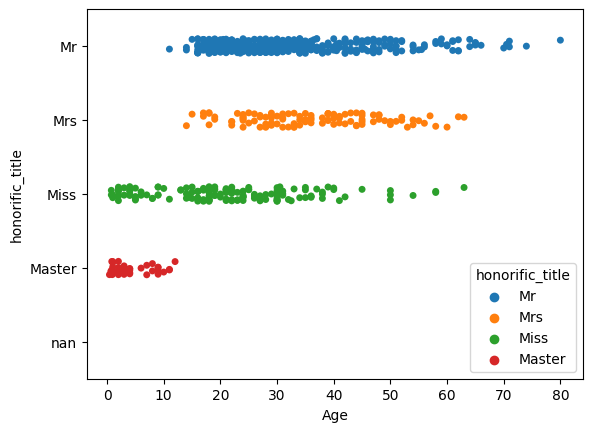

In [13]:
# Plot the distribution of Ages for each group
sns.stripplot(
    data=df_train, 
    x='Age', 
    y='honorific_title',
    hue='honorific_title'
)

In [14]:
# Carry out a set of Independent T-Test (by pairs):
#     - Null Hypothesis: means are equal
#     - Alternative Hypothesis: means are different

alpha = 0.05  # Set your significance level

# Get the Ages of the TOP4 honorific titles
mr_ages = df_train.loc[
    df_train['honorific_title'] == 'Mr', 'Age'
].values
mrs_ages = df_train.loc[
    df_train['honorific_title'] == 'Mrs', 'Age'
].values
miss_ages = df_train.loc[
    df_train['honorific_title'] == 'Miss', 'Age'
].values
master_ages = df_train.loc[
    df_train['honorific_title'] == 'Master', 'Age'
].values

groups = {
    'Mr': mr_ages, 
    'Mrs': mrs_ages,
    'Miss': miss_ages, 
    'Master': master_ages
}

# Carry out a T-test for each pair of honorific titles
for i1, (g1, vals1) in enumerate(groups.items()):
    for i2, (g2, vals2) in enumerate(groups.items()):
        
        if i1 <= i2:
            # Avoid duplicated tests and the case g1==g2
            continue
            
        # Perform an independent t-test using 'vals1' and 'vals2'
        t_stat, p_value = stats.ttest_ind(
            a=vals1, b=vals2, equal_var=False, nan_policy='omit'
        )
        
        # Interpret the results
        if p_value < alpha:  # Alternative Hypothesis 
            # group1 and group2 have (statistiacally) different 
            # mean value with confidence 1-alpha [%]
            res = 'REJECT Null Hypothesis (means are different)'
        else:  # Null Hypothesis
            # group1 and group2 have (statistiacally) equal 
            # mean value with confidence 1-alpha [%]
            res = 'ACCEPT Null Hypothesis (means are equal)'

        print(f"{g1} - {g2}:\n    {res} [p_value={round(p_value, 6)}]")

Mrs - Mr:
    REJECT Null Hypothesis (means are different) [p_value=0.006056]
Miss - Mr:
    REJECT Null Hypothesis (means are different) [p_value=0.0]
Miss - Mrs:
    REJECT Null Hypothesis (means are different) [p_value=0.0]
Master - Mr:
    REJECT Null Hypothesis (means are different) [p_value=0.0]
Master - Mrs:
    REJECT Null Hypothesis (means are different) [p_value=0.0]
Master - Miss:
    REJECT Null Hypothesis (means are different) [p_value=0.0]


<div style="border-radius: 10px; border: #fa9c1b solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    <b> 🌟 Sex 🌟</b> 
    <br>
    <dl>
        <dt><b>Description 📝:</b></dt>
        <dd>Sex of the passengers. Binary feature.
        </dd>
        <dt><b>Missing values 🤷‍♂️:</b></dt>
        <dd> None. <dd>
        <dt><b>Outliers 🔍:</b></dt>
        <dd> None.</dd>
        <dt><b>Comments 💬:</b></dt>
        <dd> 
            ➤ The same categories appear in the training and test datasets<br>
            ➤ The distribution of categories in the training and test datasets are similar<br>
            ➤ Only 40% of the passengers were females, but they had a <b>>70% chance of surviving!</b><br>
            ➤ We could build a classifier that predicts survival only for women (and death for men), and would achieve a decent accuracy. It could serve as a good first result (baseline).
        </dd>
    </dl>
</div>

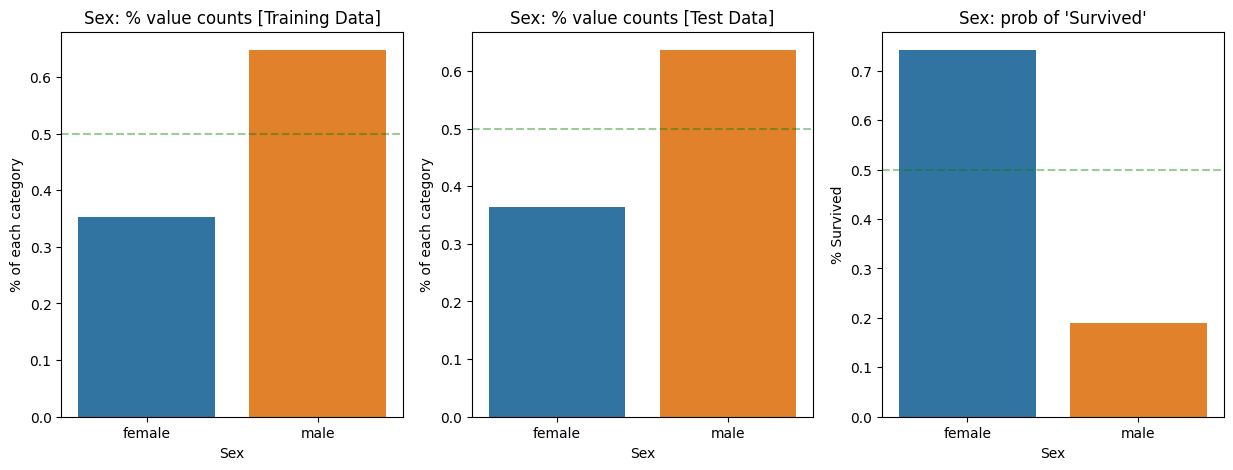

In [15]:
eda_bar_plots(feature='Sex')

<div style="border-radius: 10px; border: #fa9c1b solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    <b> 🌟 SibSp 🌟</b> 
    <br>
    <dl>
        <dt><b>Description 📝:</b></dt>
        <dd> The number of siblings and spouses aboard [Integer]. May be considered Numerical, Categorical, or Ordinal.
        </dd>
        <dt><b>Missing values 🤷‍♂️:</b></dt>
        <dd> None.<dd>
        <dt><b>Outliers 🔍:</b></dt>
        <dd> 68% of the values are <code>0</code>, 23% are <code>1</code>, and the remaining 9% are <code>2</code>, <code>3</code>, <code>4</code>, <code>5</code>, <code>8</code>.</dd>
        <dt><b>Comments 💬:</b></dt>
        <dd> 
            ➤ We will group this variable into three different groups: <code>0</code>, <code>1</code>, and <code>>=2</code>.<br>
            ➤ The same categories (values) appear in the training and test datasets<br>
            ➤ The distribution of categories in the training and test datasets are similar<br>
            ➤ 68% of the passengers do not have any sibling or spouse aboard<br>
        </dd>
    </dl>
</div>

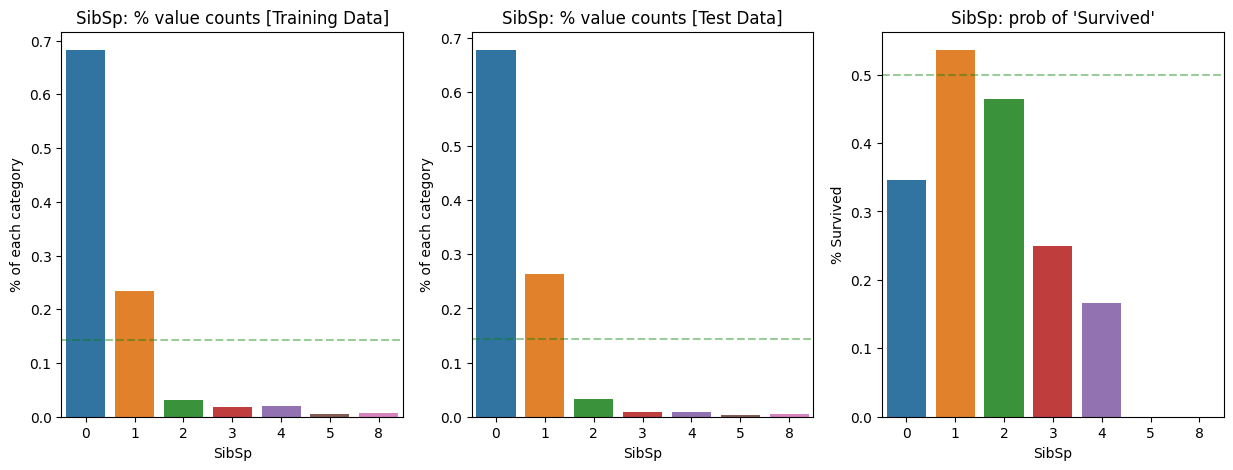

In [16]:
# 'SibSp' before applying the transformation:
eda_bar_plots(feature='SibSp')

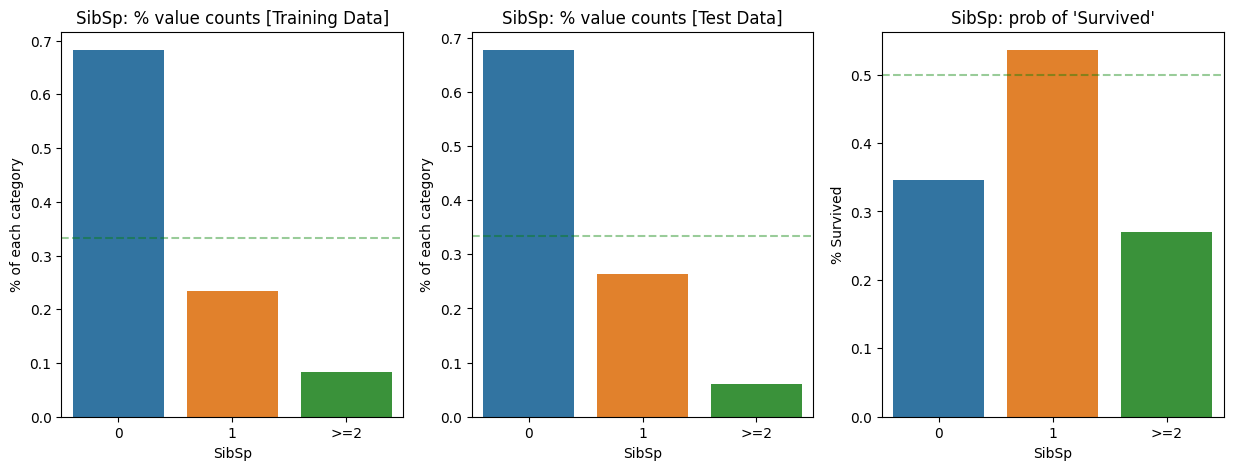

In [17]:
# 'SibSp' after applying the transformation:
df_train['SibSp'] = df_train['SibSp'].map(
    lambda s: str(s) if s < 2 else '>=2'
)
df_test['SibSp'] = df_test['SibSp'].map(
    lambda s: str(s) if s < 2 else '>=2'
)

eda_bar_plots(feature='SibSp')

<div style="border-radius: 10px; border: #fa9c1b solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    <b> 🌟 Parch 🌟</b> 
    <br>
    <dl>
        <dt><b>Description 📝:</b></dt>
        <dd> The number of parents and childrens aboard [Integer]. May be considered Numerical, Categorical, or Ordinal.
        </dd>
        <dt><b>Missing values 🤷‍♂️:</b></dt>
        <dd>None.<dd>
        <dt><b>Outliers 🔍:</b></dt>
        <dd>76% of the values are <code>0</code>, and the remaining 24% are <code>>0</code>. The values greater than zero have very little representation (less than 1% in most cases). </dd>
        <dt><b>Comments 💬:</b></dt>
        <dd> 
            ➤ We will turn this variable into a binary one: <code>0</code> and <code>>0</code>.<br>
            ➤ The same categories (values) appear in the training and test datasets<br>
            ➤ The distribution of categories in the training and test datasets are similar<br>
            ➤ 76% of the passengers do not have any parents or children aboard<br>
        </dd>
    </dl>
</div>

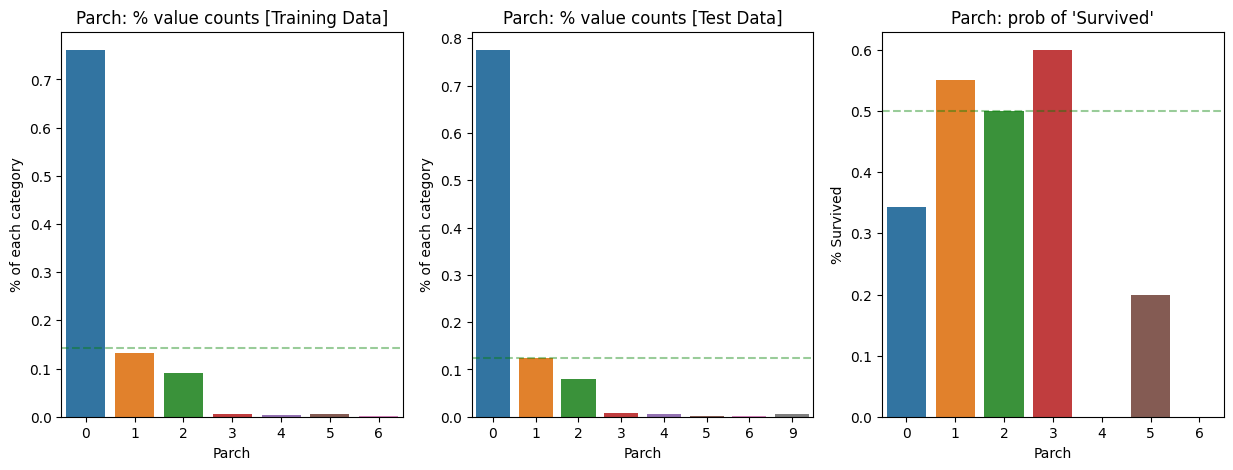

In [18]:
# 'Parch' before applying the transformation:
eda_bar_plots(feature='Parch')

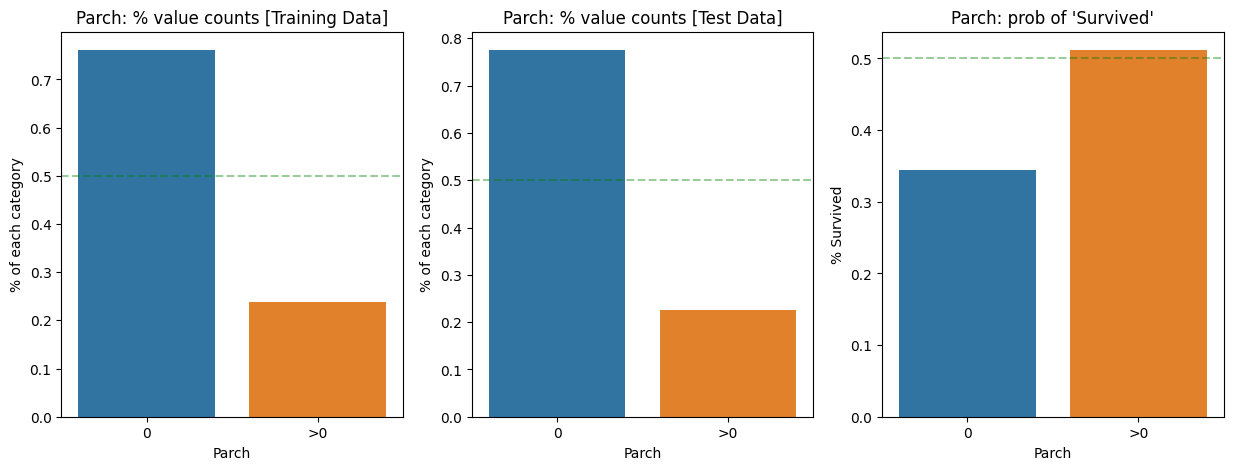

In [19]:
# 'Parch' after applying the transformation:
df_train['Parch'] = df_train['Parch'].map(
    lambda p: '0' if p == 0 else '>0'
)
df_test['Parch'] = df_test['Parch'].map(
    lambda p: '0' if p == 0 else '>0'
)

eda_bar_plots(feature='Parch')

<div style="border-radius: 10px; border: #fa9c1b solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    <b> 🌟 Fare 🌟</b> 
    <br>
    <dl>
        <dt><b>Description 📝:</b></dt>
        <dd>Passenger fare. Numerical feature.
        </dd>
        <dt><b>Missing values 🤷‍♂️:</b></dt>
        <dd> Just 1 sample in Test data. <dd>
        <dt><b>Outliers 🔍:</b></dt>
        <dd> There are 4 extremely high values which are <code>512.3292</code> (3 in training data and 1 in test data). The rest of the values are all lower than <code>300</code>.</dd>
        <dt><b>Comments 💬:</b></dt>
        <dd> 
            ➤ The distribution of Fare in the training and test datasets are similar.<br>
            ➤ We will set the <b>maximum value to 300</b>. Larger values will be cut to this new maximum. The CatBoost algorithm will not notice this change, it is more for visualization purposes.<br>
        </dd>
    </dl>
</div>

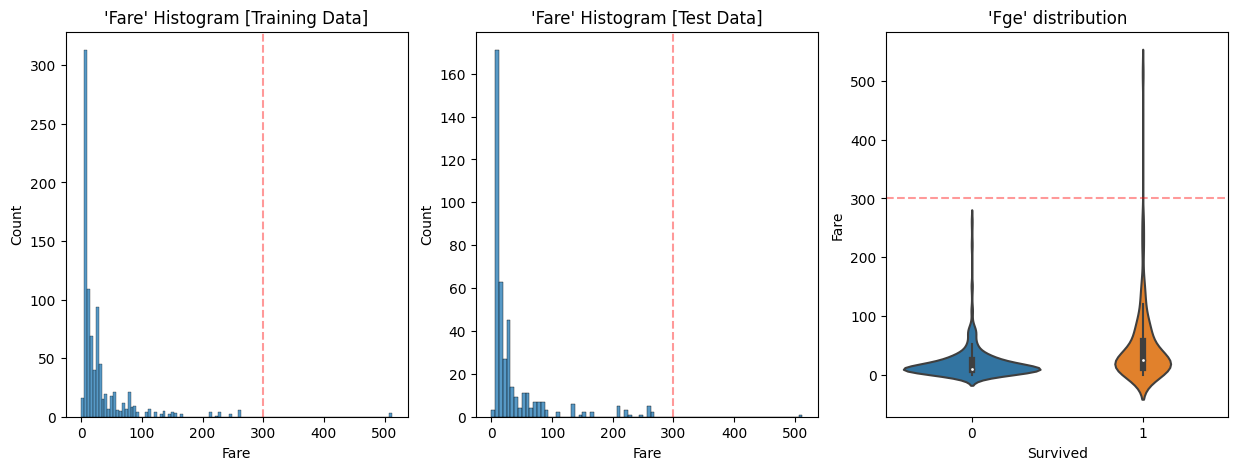

In [20]:
# 'Fare' before applying the transformation:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))

sns.histplot(data=df_train, x='Fare', ax=ax1)
ax1.axvline(300, color='red', alpha=0.4, linestyle='--')
ax1.set(title="'Fare' Histogram [Training Data]")

sns.histplot(data=df_test, x='Fare', ax=ax2)
ax2.set(title="'Fare' Histogram [Test Data]") 
ax2.axvline(300, color='red', alpha=0.4, linestyle='--')

sns.violinplot(
    data=df_train, x='Survived', y='Fare', fill=False, ax=ax3
)
ax3.set(title="'Fge' distribution")
ax3.axhline(300, color='red', alpha=0.4, linestyle='--')

[Text(0.5, 1.0, "'Fge' distribution")]

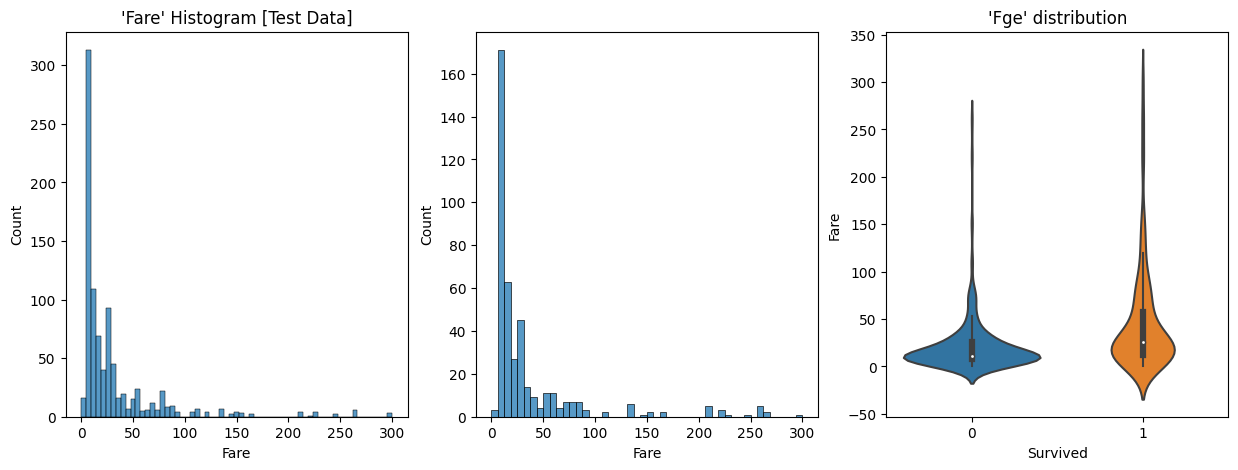

In [21]:
# 'Fare' after applying the transformation:
df_train.loc[df_train['Fare'] > 300, 'Fare'] = 300
df_test.loc[df_test['Fare'] > 300, 'Fare'] = 300

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))

sns.histplot(data=df_train, x='Fare', ax=ax1)
ax1.set(title="'Fare' Histogram [Training Data]")

sns.histplot(data=df_test, x='Fare', ax=ax2)
ax1.set(title="'Fare' Histogram [Test Data]")

sns.violinplot(
    data=df_train, x='Survived', y='Fare', fill=False, ax=ax3
)
ax3.set(title="'Fge' distribution")

<div style="border-radius: 10px; border: #fa9c1b solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    <b> 🌟 Cabin 🌟</b> 
    <br>
    <dl>
        <dt><b>Description 📝:</b></dt>
        <dd>Cabin number.
        </dd>
        <dt><b>Missing values 🤷‍♂️:</b></dt>
        <dd> 77% missing in Training data, 78% missing in Test data. <dd>
        <dt><b>Outliers 🔍:</b></dt>
        <dd> None.</dd>
        <dt><b>Comments 💬:</b></dt>
        <dd> 
            ➤ Let's remove this column since it has <b>>75% of missing values</b>.<br>
        </dd>
    </dl>
</div>

In [22]:
df_train = df_train.drop(columns=['Cabin'])
df_test = df_test.drop(columns=['Cabin'])

<div style="border-radius: 10px; border: #fa9c1b solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    <b> 🌟 Embarked 🌟</b> 
    <br>
    <dl>
        <dt><b>Description 📝:</b></dt>
        <dd>Port of embarkation. Categorical feature.
        </dd>
        <dt><b>Missing values 🤷‍♂️:</b></dt>
        <dd> 2 missing values in Training data. <dd>
        <dt><b>Outliers 🔍:</b></dt>
        <dd> None.</dd>
        <dt><b>Comments 💬:</b></dt>
        <dd> 
            ➤ The same categories appear in the training and test datasets<br>
            ➤ The distribution of categories in the training and test datasets are similar<br>
            ➤ C = Cherbourg, Q = Queenstown, S = Southampton
        </dd>
    </dl>
</div>

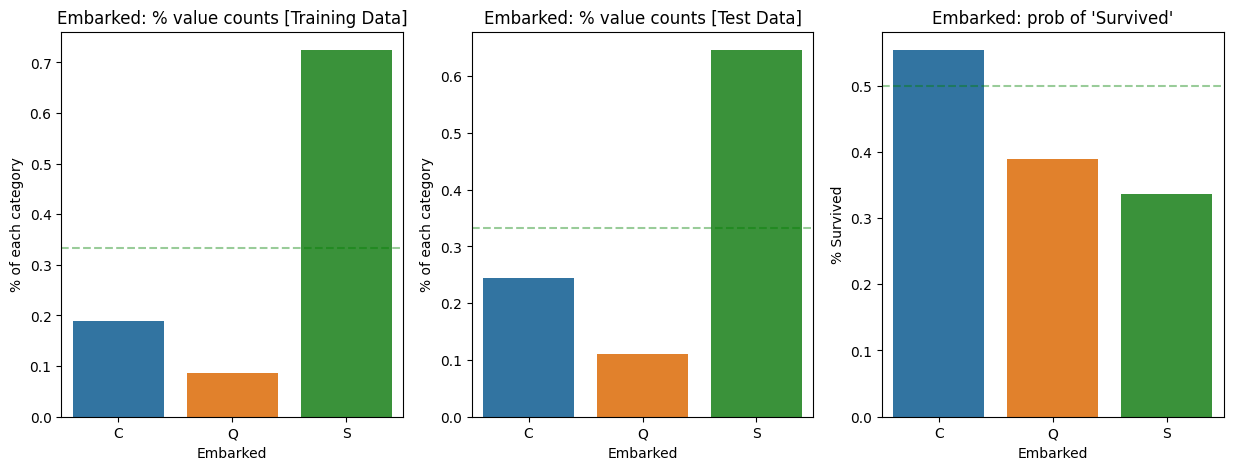

In [23]:
eda_bar_plots(feature='Embarked')

<div style="border-radius: 10px; border: #fa9c1b solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    <b> 🌟 Ticket 🌟</b> 
    <br>
    <dl>
        <dt><b>Description 📝:</b></dt>
        <dd>Ticket Number.
        </dd>
        <dt><b>Missing values 🤷‍♂️:</b></dt>
        <dd> None. <dd>
        <dt><b>Outliers 🔍:</b></dt>
        <dd> None.</dd>
        <dt><b>Comments 💬:</b></dt>
        <dd> 
            ➤ Let's remove this column since there is no clear way to get value from it.<br>
        </dd>
    </dl>
</div>

In [24]:
df_train = df_train.drop(columns=['Ticket'])
df_test = df_test.drop(columns=['Ticket'])

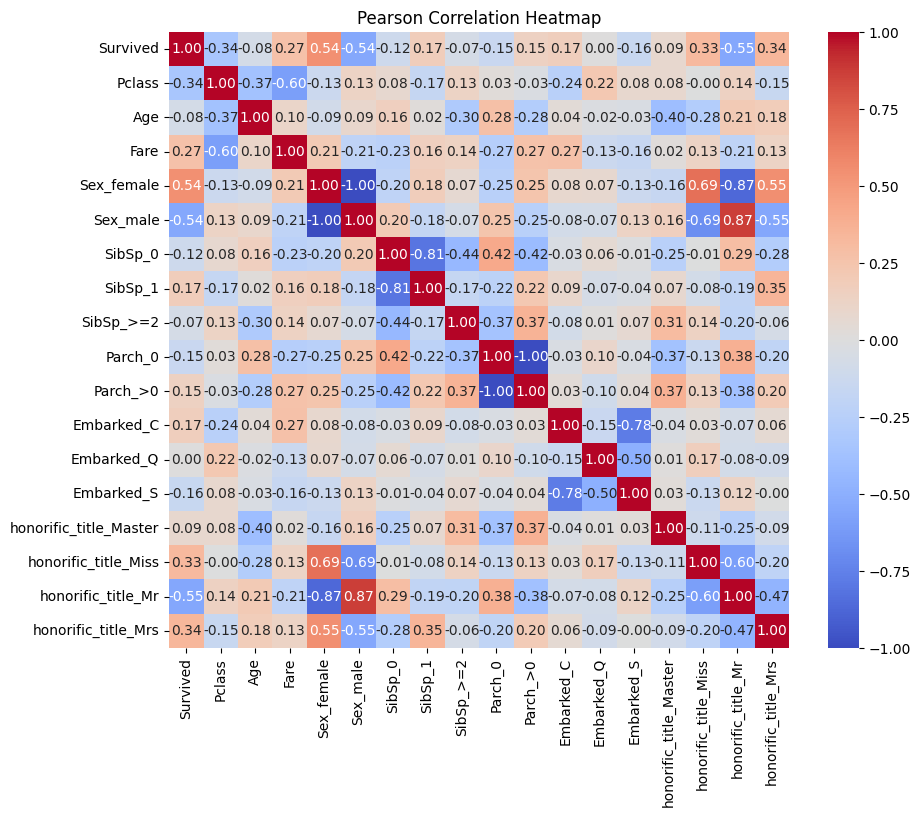

In [25]:
# Plot the PEARSON CORRELATION MATRIX to visualize
# the correlation between features and between 
# features and the target

# Since we have not preprocessed the categorical 
# features yet, let's use get_dummies just for 
# this computation
corr_matrix = pd.get_dummies(df_train).corr(method='pearson')

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix, annot=True, cmap='coolwarm', fmt=".2f"
)
plt.title("Pearson Correlation Heatmap")
plt.show()

# Data Preprocessing ⚙️🧹

<div style="border-radius: 10px; border: #6f2da8 solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
<dl>
    <dt>❌ <b>Missing Values ❌:</b></dt>
<dd>In this section, we are going to follow different Imputation Strategies to deal with missing values. The exact method will depend on each column. Let's recall the missing values in our data:
    <ul>
        <li><code>Age</code>: 20% in training data, 20% in test data</li>
        <li><code>Fare</code>: 1 sample in test data</li>
        <li><code>Embarked</code>: 2 samples in training data</li>
    <li><b>NOTE</b> that <code>Cabin</code> was removed (>75% missing values)</li>
    </ul><br>
    Now, let's see the <b>Imputation Strategies</b> that will be implemented in each case</b> 🙌:
    <ul>
        <li><code>Age</code>: Our own <b>Mean-imputation</b> stragtegy based on <code>honorific_title</code></li>
    <li><code>Fare</code>: <b>Median-Imputer</b></li>
    <li><code>Embarked</code>: <b>Most-Frequent</b> Imputer</li>
    </ul></dd><br>
    <dt>⚙️ <b>Scalers and Encoders</b> ⚙️: </dt>
    <dd>Since <code>CatBoost</code> is a <b>tree-based model</b>, <b>feature scaling</b> does not affect the performance of the model. <b>Decision trees</b> split the feature space based on binary decisions like <i>"is this feature bigger than this value?"</i>, and if you scale your data, the decisions might look different (as they are done on the scaled space) but the results should be the same. <br>
Moreover, Catboost is well-known for its ability to <b>deal with categorical features automatically</b> by transforming them into numerical representations.
    </dd><br>
    <dt>🌲📊 <b>Plot Feature Importance</b> 🌲📊:<dt>
<dd>A Feature Importance plot in a <code>CatBoost</code> model is a graphical representation that shows the importance or contribution of each feature in the model's predictive performance. CatBoost provides a convenient way to visualize feature importance.<br>
The primary purpose of a Feature Importance plot is to <b>help you understand which features have the most impact on your model's predictions</b>. This information can be valuable for feature selection, model interpretation, and model optimization
</dd>
    </dl>
    </div>

In [26]:
class AgeImputer(
    SimpleImputer, TransformerMixin
):
    """
    Age Imputer from 'honorific_title' column.
    
    There are four honorific titles: Mr, Mrs, Miss, Master.
    We proved that these groups have statistically different
    mean Ages (Independent T-tests).
    
    Imputation strategy:
        - fit:  compute the mean Age for each honorifit title
            Compute the mean Age for those who do not have title
        - transform:  if Age is missing for a passenger, if it has
            honorific title, the mean Age for that honorific title
            will be assigned. Else, the mean age for those who do
            not have title will be assigned.
    """
    
    def __init__(self) -> None:
        """
        Initialize an AgeImputer instance
        """
    
        # Initialize the parent Sklearn classes
        super().__init__()  
        # Define the mappig {title_: mean Age for title_}
        self.title2age = {}  
        # Define the mean age of those people with no title
        self.no_title_mean_age = None
        self.is_fitted = False
        
        
    def fit(self, X: pd.DataFrame, y=None):
        """
        Fits the 'title2age' and 'honorific_title' using 'X'.
        
        'X' is assumed to be Training Data (not Test Data!)
        'X' is assumed to be a non-empty data frame with
            (at least) the columns 'Age' and 'honorific_title'
        """
    
        df_groupby = df_train.groupby(
            by='honorific_title'
        ).agg({'Age': 'mean'})
        self.title2age = df_groupby.to_dict()['Age']
        
        if X['honorific_title'].isna().sum() == 0:
            self.no_title_mean_age = X['Age'].mean()
        else:
            self.no_title_mean_age = X.loc[
                X['honorific_title'].isna(), 'Age'
            ].mean()
        self.is_fitted = True
        return self

    
    def transform(self, X: pd.DataFrame, y=None) -> pd.DataFrame:
        """
        Transform 'X' by imputing the missing values of 'Age'
        
        'X' is assumed to be Training Data (not Test Data!)
        'X' is assumed to be a non-empty data frame with
            (at least) the columns 'Age' and 'honorific_title'
        """
        
        if not self.is_fitted:
            raise Exception("Call the 'fit' method first")
        
        X_out = X.copy(deep=True)
        missing_age_idx = X.loc[X['Age'].isna(), :].index
        age_col_idx = np.where(X.columns == 'Age')[0][0]
        
        for idx in missing_age_idx:
        
            # get the honorific_title of the 'idx' row
            title = X.loc[idx,'honorific_title']
        
            if title in self.title2age:
                X_out.loc[idx, 'Age'] = self.title2age[title]
            else:
                X_out.loc[idx, 'Age'] = self.no_title_mean_age
            
        return X_out['Age'].to_frame()

In [27]:
# Create three imputers, one for each feature having missing values
age_imputer = AgeImputer().set_output(transform='pandas')

fare_imputer = SimpleImputer(
    strategy='median'
).set_output(transform='pandas')

embarked_imputer = SimpleImputer(
    strategy='most_frequent'
).set_output(transform='pandas')


# Create a general imputer (for all the variables)
# with the three simple imputer
imputer = ColumnTransformer(
    transformers=[
        ('age_imp', age_imputer, ['Age', 'honorific_title']),
        ('fare_imp', fare_imputer, ['Fare']),
        ('embarked_imp', embarked_imputer, ['Embarked'])
    ],
    remainder='passthrough',  # do nothing on the other features
    verbose_feature_names_out=False
).set_output(transform='pandas')

In [28]:
# The column 'honorific_title' has a double use:
#   - (1) it is used to impute the missing Age values
#   - (2) it is used as a categorical feature
#
# For the first scenario (1), we need the raw 'honorific_title'
# as we have it right now. But for the second case (2), let's 
# create a new binary column (indication) for each category
# [Mr, Mrs, Miss, Master]. In this chunk of code, we implement
# the steps to get the result for the second case (2)

# Create a copy of the original column to keep it in the data
df_train['dummy_honorific_title'] = df_train['honorific_title']
df_train = pd.get_dummies(
    data=df_train, 
    columns=['dummy_honorific_title'],
    prefix='',
    prefix_sep='',
    dummy_na=False,  # do not add a 'nan' column
    drop_first=False,  # Keep all the Top4 honorific titles
    dtype=int
)

df_test['dummy_honorific_title'] = df_test['honorific_title']
df_test = pd.get_dummies(
    data=df_test, 
    columns=['dummy_honorific_title'],
    prefix='',
    prefix_sep='',
    dummy_na=False,  # do not add a 'nan' column
    drop_first=False,  # Keep all the Top4 honorific titles
    dtype=int
)

# CatBoost Training 🏋️‍♂️🌲

<div style="border-radius: 10px; border: #afb83b solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    <code>catboost</code> is a Python library for <b>Gradient Boosting</b> that excels in handling <b>categorical variables</b> and offers automatic feature selection. It works by iteratively improving predictions through the combination of <b>decision trees</b>. CatBoost is known for its strong performance and is suitable for both beginners and experienced users. <br><br>
We will optimize the most relevant hyperparameters🎯:
    <ul>
        <li><code>n_estimators</code>: number of trees (boosting iterations) in the CatBoost model [int].</li>
        <li><code>learning_rate</code>: step size for adjusting the model in each iteration [float].</li>
        <li><code>depth</code>: maximum depth of the individual decision trees [int].</li>
        <li><code>l2_leaf_reg</code>: L2 regularization coefficient for leaf values [float].</li>
        </ul><br>

<code>RandomizedSearchCV</code> is an Sklearn module for <b>hyperparamter optimization</b> using <b>cross-validation</b>. In contrast to <code>GridSearchCV</code>, not all parameter values are tried out, but rather a fixed number of parameter settings is sampled from the specified distributions (<code>n_iters</code>).
    </div>

In [29]:
X_train = df_train.drop(columns=['Survived'])
y_train = df_train['Survived']

In [30]:
# Define the categorical features for the Catboost model
cat_features = [
    'Sex', 'Embarked', 'Pclass', 'SibSp',
    'Parch', 'Master', 'Miss', 'Mr', 'Mrs'
]

In [31]:
# Set the RandomizedSearchCV parameters:

# Number of parameter settings that are sampled
n_iter = 10  # recommended: between 30 and 60
# 'n_iter' trades off runtime vs quality of the solution
# NOTE: here I used 10 to run the notebook faster

# Number of folds in the cross-validation splitting strategy
cv = 6  # recommended: between 4 and 10

In [32]:
# Defined the grid of hparam values
catboost_hparams = {
    'catboost_clf__n_estimators': [
        50, 100, 150, 200, 250, 300
    ],
    'catboost_clf__depth': [
        4, 6, 8, 10, 12
    ],
    'catboost_clf__learning_rate': stats.uniform(
        loc=0.001, scale=0.099
    ),
    'catboost_clf__l2_leaf_reg': stats.uniform(
        loc=1, scale=9
    )
}

# Define a basic CatBoost Classifier
catboost_clf = CatBoostClassifier(
    cat_features=cat_features,
    verbose=0
)

# Concatenate the Imputer and the Classifier
# using an Sklearn Pipeline
catboost_pipe = Pipeline(steps=[
    ('imputer', imputer),
    ('catboost_clf', catboost_clf)
])

# Define the Randomized Search with Cross-Validation
catboost_cv = RandomizedSearchCV(
    estimator=catboost_pipe,
    param_distributions=catboost_hparams,
    n_iter=n_iter,
    scoring='accuracy',
    n_jobs=-1,
    cv=cv,
    verbose=0,
)

# Run the Randomized Search with Cross-Validation
catboost_cv.fit(X=X_train, y=y_train)

# Print the results:
print('CatBoost best params:', catboost_cv.best_params_)
print()
print('CatBoost best cv accuracy:', catboost_cv.best_score_)

CatBoost best params: {'catboost_clf__depth': 6, 'catboost_clf__l2_leaf_reg': 1.3728649905833292, 'catboost_clf__learning_rate': 0.09487432733444681, 'catboost_clf__n_estimators': 300}

CatBoost best cv accuracy: 0.8339077332365923


Text(0.5, 1.0, 'CatBoost Feature Importance')

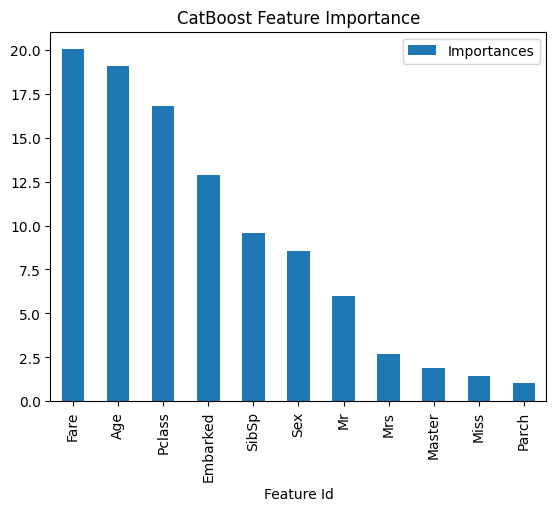

In [33]:
# Let's plot the Feature Importance
feature_importance = catboost_cv.best_estimator_.named_steps[
    'catboost_clf'
].get_feature_importance(
    type='FeatureImportance',
    prettified=True
)

feature_importance.plot.bar(x='Feature Id', y='Importances')
plt.title('CatBoost Feature Importance')

# Submission File 🏆🎯

<div style="border-radius: 10px; border: #d21404 solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">

Finally, let's train a <b>final CatBoostClassifier model</b> to create our <b>Submission file</b>.<br><br>
We will feed the model with the entire <i>Training Dataset</i>, and we will use the best set of hyperparmers we found in the preovious section.
    Then, we will make the <b>predictions on the test dataset</b>, and create the submission file named <code>submission.csv</code><br><br>
    <b>NOTE</b> that you may have found a different set of best hyperparameters, and thtat is okay!
</div>

In [34]:
# Create a final model with the best set of hyperparameters
# found in the previous section (RandomizedSearchCV)

final_catboost_clf = CatBoostClassifier(
    n_estimators=200,
    depth=4,
    learning_rate=0.056544686493756435,
    l2_leaf_reg=2.207718425785015,
    cat_features=cat_features,
    random_state=1234,
    verbose=0
)

final_catboost_pipe = Pipeline(steps=[
    ('imputer', imputer),
    ('catboost_clf', catboost_clf)
])

# Train the final model using the entire Training Dataset
final_catboost_pipe.fit(X_train, y_train)

Pipeline(steps=[('imputer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('age_imp', AgeImputer(),
                                                  ['Age', 'honorific_title']),
                                                 ('fare_imp',
                                                  SimpleImputer(strategy='median'),
                                                  ['Fare']),
                                                 ('embarked_imp',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Embarked'])],
                                   verbose_feature_names_out=False)),
                ('catboost_clf',
                 <catboost.core.CatBoostClassifier object at 0x7ff8986b2770>)])

In [35]:
# Make the predictions on the Test dataset
predictions = final_catboost_pipe.predict(
    df_test.drop(columns=['PassengerId'])
)
print('Test predictions = \n', predictions)

Test predictions = 
 [0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 0 0 1 0 0 1]


In [36]:
# Prepare the submission file: PassengerId - Survived
submission = pd.DataFrame({
    'PassengerId' : df_test['PassengerId'],
    'Survived' : predictions
})

submission['Survived'] = submission['Survived'].astype(int)

submission.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [37]:
# Save the submission file
submission.to_csv('submission.csv', index=False)
print('your submission file is saved!')

your submission file is saved!


<div style="border-radius: 10px; border: #6b6b6b solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
Now, go to the <b><code>'Submit to competition'</code></b> section of the Titanic Competition (usually in the righ-hand side of the screen when you run a notebook). Drag your <code>submission.csv</code> file from the directory which contains your code and make your submission!<br><br>

Otherwise, download your <code>submission.csv</code> and go to https://www.kaggle.com/competitions/titanic and click on <b><code>Submit Predictions</code></b>.
</div>

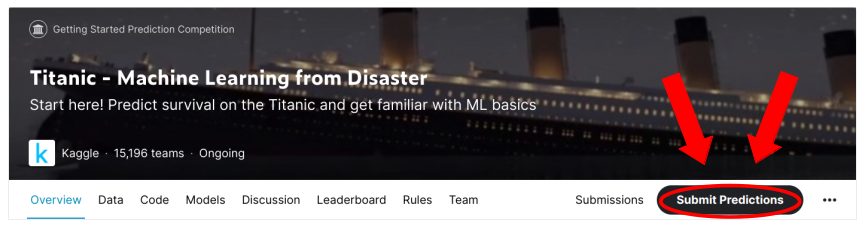

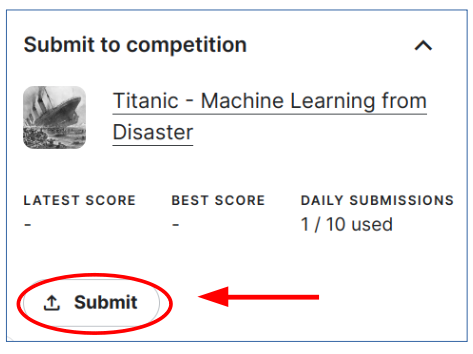

# 🚢😉✌️ WE GOT IT! ✌️😉🚢

<div class="alert alert-block alert-success">
    If you enjoyed it, please consider <b>GIVING IT AN UPVOTE</b>👍 Thanks!🔝
</div>

<div style="border-radius: 10px; border: #3bb143 solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">

🔚Thank you very much for reading until the end❗<br><br>
I hope you found this notebook <b>helpful</b> and easy to read and understand 😉. <br>

Feel free to leave your <b>feedback</b>, <b>doubts</b> or <b>comments</b> in the comments section. <b>I will be glad to answer them all</b> 😁.
</div>